device : cuda
Loaded encoder "encoder.pt" trained to step 1564501
Synthesizer using device: cuda


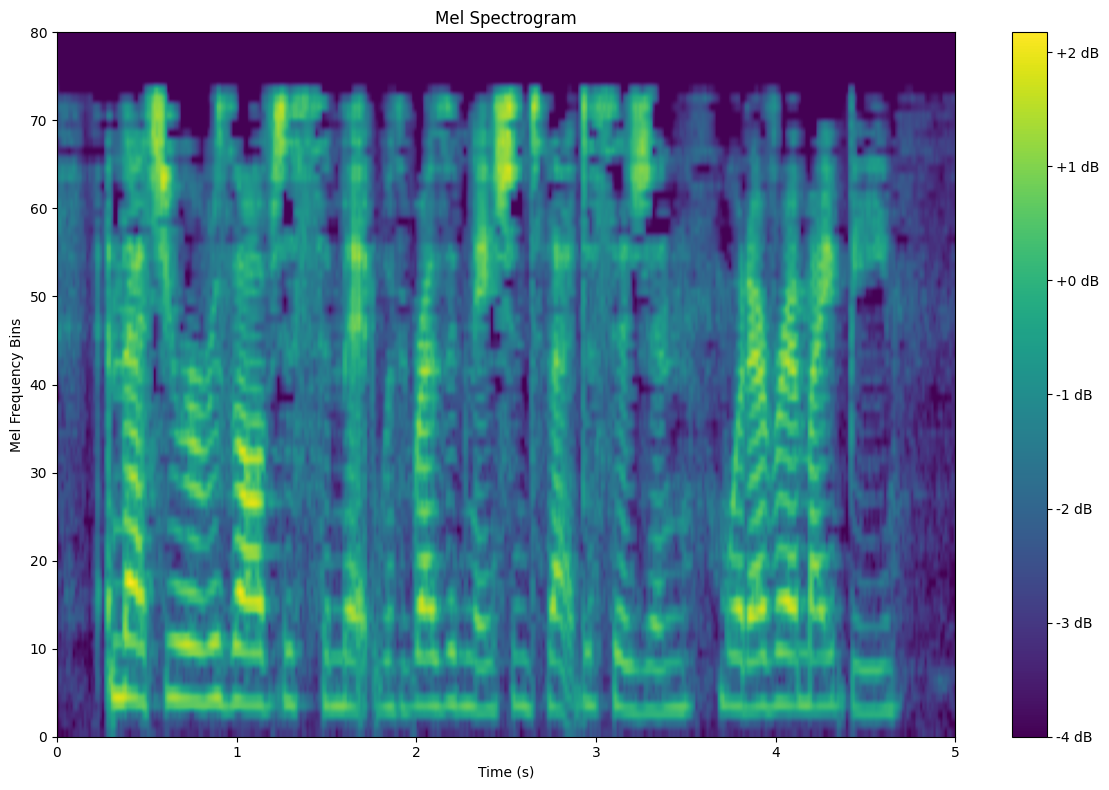

In [19]:
import torch
from encoder import inference as encoder
from synthesizer.inference import Synthesizer
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from toolbox.utterance import Utterance

def plot_mel_spectrogram(mel_spectrogram, num_mels=80, hop_size=200, sample_rate=16000):
    # 시간 및 주파수 축 계산
    num_mels, num_frames = mel_spectrogram.shape
    time_bins = np.linspace(0, num_frames * (hop_size / sample_rate), num_frames)
    mel_bins = np.linspace(0, num_mels, num_mels)

    plt.figure(figsize=(12, 8))
    # 시각화
    plt.imshow(mel_spectrogram, aspect='auto', origin='lower', 
               cmap='viridis', 
               extent=[time_bins[0], time_bins[-1], mel_bins[0], mel_bins[-1]])
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Mel Frequency Bins')
    plt.tight_layout()
    plt.show()

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'device : {device}')
texts = ["안녕하세요 반갑습니다. 제 이름은 랄로입니다."]

# encoder 준비
encoder_model_path = Path("C:/Users/admin/Desktop/Narrify/Real-Time-Voice-Cloning/saved_models/default/encoder.pt")
enc = encoder.load_model(encoder_model_path, device)


# synthesizer 준비
syn_model_path = Path("C:/Users/admin/Desktop/Narrify/sv2tts_korean/synthesizer/saved_models/synthesizer_second_best_model.pt")
synthesizer = Synthesizer(syn_model_path, True)


# ref 준비, spec 만들기
fpath = "C:/Users/admin/Desktop/Narrify_data/test/samples/3575_00000.mp3"
wav = Synthesizer.load_preprocess_wav(fpath)
spec = synthesizer.make_spectrogram(wav) # ref spec
plot_mel_spectrogram(spec)


Trainable Parameters: 30.877M
Loaded synthesizer "synthesizer_second_best_model.pt" trained to step 86000
+----------+---+
| Tacotron | r |
+----------+---+
|   86k    | 2 |
+----------+---+
 

| Generating 1/1


Done.



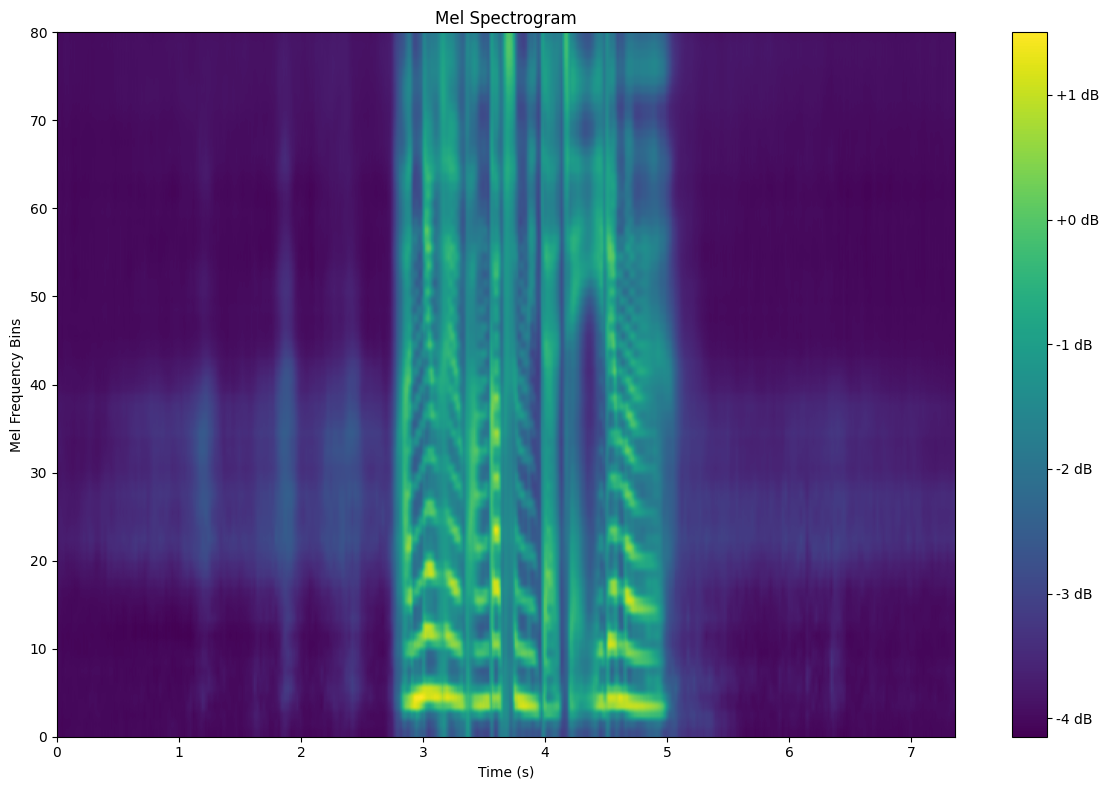

In [20]:
# 합성
encoder_wav = encoder.preprocess_wav(wav)
embed, partial_embeds, _ = encoder.embed_utterance(encoder_wav, return_partials=True)
name = "3575_00000"
speaker_name = name
embeds = [embed] * len(texts)
specs = synthesizer.synthesize_spectrograms(texts, embeds)
plot_mel_spectrogram(specs[0])
breaks = [spec.shape[1] for spec in specs]

In [ ]:
# # vocode
# vocode_seed = 777
# torch.manual_seed(vocode_seed)

# model_fpath = self.ui.current_vocoder_fpath
# # Case of Griffin-lim
# if model_fpath is None:
#     return

# self.ui.log("Loading the vocoder %s... " % model_fpath)
# self.ui.set_loading(1)
# start = timer()
# vocoder.load_model(model_fpath)
np.set_printoptions(threshold=np.inf)
for i in range(specs[0].shape[-1]):
    print(max(specs[0][:, i]))